<a href="https://colab.research.google.com/github/csharpshooter/EVA/blob/master/A15-PartB/A15_B_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Mon May 25 00:59:42 2020


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp "/content/gdrive/My Drive/MaskRCNNDataset/zips/Background.zip" "/content/"
!cp "/content/gdrive/My Drive/MaskRCNNDataset/zips/OverLayedDepthMasks.zip" "/content/"
!cp "/content/gdrive/My Drive/MaskRCNNDataset/zips/OverLayedImages.zip" "/content/"
!cp "/content/gdrive/My Drive/MaskRCNNDataset/zips/OverLayedMask.zip" "/content/"

In [0]:
!mkdir MonocularDS
!mkdir "/content/MonocularDS/Background"
!mkdir "/content/MonocularDS/OverLayedDepthMasks"
!mkdir "/content/MonocularDS/OverLayedImages"
!mkdir "/content/MonocularDS/OverLayedMask"

In [0]:
# cd MonocularDS

In [0]:
!unzip -q "/content/Background.zip" -d "/content/MonocularDS/Background"
!unzip -q "/content/OverLayedDepthMasks.zip" -d "/content/MonocularDS/OverLayedDepthMasks"
!unzip -q "/content/OverLayedImages.zip" -d "/content/MonocularDS/OverLayedImages"
!unzip -q "/content/OverLayedMask.zip" -d "/content/MonocularDS/OverLayedMask"

In [0]:
!git clone https://github.com/csharpshooter/EVA.git 

Cloning into 'EVA'...
remote: Enumerating objects: 329, done.
remote: Counting objects: 100% (329/329), done.
remote: Compressing objects: 100% (260/260), done.
remote: Total 3919 (delta 189), reused 165 (delta 65), pack-reused 3590
Receiving objects: 100% (3919/3919), 3.49 GiB | 40.08 MiB/s, done.
Resolving deltas: 100% (1000/1000), done.
Checking out files: 100% (2520/2520), done.


In [0]:
!git pull

In [0]:
cd /content/EVA/A15-PartB/

/content/EVA/A15-PartB


In [0]:
!pip install -U git+https://github.com/albu/albumentations
!pip install -U tqdm

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-t4p9mn3y
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-t4p9mn3y
     |████████████████████████████████| 634kB 4.8MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65038 sha256=1a93035d01a9dea654e8682459ec5f8adad7fea5b8929464e440ab28bd5c28f7
  Stored in directory: /tmp/pip-ephem-wheel-cache-ef5ylhh2/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=0948cdf015959b42fdd2a09a8ca6e3e32c8de90722e2abe32d664156b8829943
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
  

In [0]:
from src.dataset.monocularhelper import MonocularHelper
from src.imports import *
import torch.optim.lr_scheduler
import os


%config IPCompleter.greedy=True
%reload_ext autoreload

In [0]:
%autoreload 2  # Autoreload all modules

In [0]:
def printgpuinfo():
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
      print('and then re-execute this cell.')
    else:
      print(gpu_info)
    
printgpuinfo()

Mon May 25 01:19:50 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |     10MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
def showsysteminfo():
    from psutil import virtual_memory
    ram_gb = virtual_memory().total / 1e9
    ram_gb_avail = virtual_memory().available / 1e9
    ram_gb_used = virtual_memory().active / 1e9
    print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
    print('Your runtime has {:.1f} gigabytes of free RAM\n'.format(ram_gb_avail))
    print('Your runtime has {:.1f} gigabytes of used RAM\n'.format(ram_gb_used))    
showsysteminfo()

Your runtime has 27.4 gigabytes of available RAM

Your runtime has 26.0 gigabytes of free RAM

Your runtime has 1.5 gigabytes of used RAM



In [0]:
import torch
print(torch.__version__)

1.5.0+cu101


In [0]:
helper = MonocularHelper()
final_output = r'/content/MonocularDS/OverLayedImages/OverLayedImages'
final_output_mask = r'/content/MonocularDS/OverLayedMask/OverLayedMask'
final_output_dm = r'/content/MonocularDS/OverLayedDepthMasks/OverLayedDepthMasks'
bg_path = r'/content/MonocularDS/Background/Background'

# final_output = r'/content/MonocularDS/OverLayedImages'
# final_output_mask = r'/content/MonocularDS/OverLayedMask'
# final_output_dm = r'/content/MonocularDS/OverLayedDepthMasks'
# bg_path = r'/home/abhijit/EVARepo/MonocularDS/Background'

train_data, train_label, test_data, test_label = helper.get_train_test_data(masks_folder=final_output_mask,
                                                                            images_folder=final_output,
                                                                            depth_masks_folder=final_output_dm,
                                                                            no_of_batches=40,
                                                                            total_images_count=400000,
                                                                            bg_folder=bg_path)

100%|██████████| 40/40 [00:03<00:00, 11.81it/s]


In [0]:
print(len(train_label))
print(len(test_label))
# torch.backends.cudnn.benchmark = True

batch_size = 16
image_size=224

train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms(image_net_mean, image_net_std, image_size)
ds = dst.Dataset()

train_dataset = ds.get_monocular_train_dataset(train_image_data=train_data, train_image_labels=train_label,
                                               train_transforms=train_transforms)

test_dataset = ds.get_monocular_test_dataset(test_image_labels=test_label, test_image_data=test_data,
                                             test_transforms=test_transforms)

torch.manual_seed(1)

dataloader = dl.Dataloader(traindataset=train_dataset, testdataset=test_dataset, batch_size=batch_size)
train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

280000
120000
16


cuda
model loaded


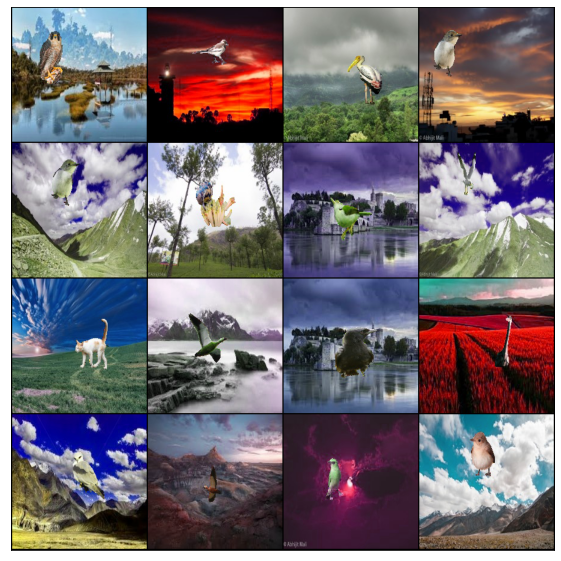

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 64, 64]             880
       BatchNorm2d-2           [-1, 16, 64, 64]              32
              ReLU-3           [-1, 16, 64, 64]               0
            Conv2d-4           [-1, 16, 64, 64]           2,320
       BatchNorm2d-5           [-1, 16, 64, 64]              32
              ReLU-6           [-1, 16, 64, 64]               0
        DoubleConv-7           [-1, 16, 64, 64]               0
            Conv2d-8           [-1, 16, 64, 64]           2,320
              ReLU-9           [-1, 16, 64, 64]               0
           Conv2d-10           [-1, 16, 64, 64]           2,320
             ReLU-11           [-1, 16, 64, 64]               0
           Conv2d-12           [-1, 32, 64, 64]           4,640
             ReLU-13           [-1, 32, 64, 64]               0
           Conv2d-14           [-1, 32,

In [0]:
import torch.nn as nn
# use_cuda = torch.cuda.is_available()
# device = torch.device("cuda" if use_cuda else "cpu")

cnn_model, device = utils.Utils.createDepthModel()
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.5, momentum=0.9, weight_decay=1e-5) #1e-5

# for name, param in cnn_model.named_parameters():
#     print(name)
#     print(param)

# for name, param in cnn_model.named_parameters():
# #     print(name)
# #     print(param)
#     if "bn1" in name or "bn2" in name or "double_conv" in name:
#         i = 0
# #         nn.init.constant_(param, 0)        
#     elif "weight" in name:
#         nn.init.kaiming_normal_(param, mode="fan_out", nonlinearity="relu")
# #     elif "bias" in name:
# #         nn.init.constant_(param, 0)

last_epoch = 1

model_path = r'/content/EVA/A15-PartB/finalmodelwithdata-128k.pt'
if os.path.exists(model_path):
    print('model loaded')
    checkpoint, epoch, model_state_dict, optimizer_state_dict, train_losses, train_acc, test_losses, test_acc \
        , test_losses, lr_data, class_correct, class_total = utils.Utils.loadmodel(model_path)
    cnn_model.load_state_dict(model_state_dict)
    # optimizer.load_state_dict(optimizer_state_dict)
    last_epoch = last_epoch + checkpoint['epoch']

# cnn_model = torchvision.models.resnet18(pretrained=False, num_classes=2).cuda(device)


sample = next(iter(train_loader))

imgs = sample[0][0]

utils.Utils.show(imgs, nrow=4)

train_model = train.TrainModel()

train_model.showmodelsummary(model=cnn_model,input_size=[(4,3,64,64)])
# optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.01)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.05, patience=1, 
            verbose=True, threshold=0.01, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)

lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
epochs = 6

  0%|          | 0/17500 [00:00<?, ?it/s]

EPOCH: 1


  0%|          | 2/17500 [00:01<4:34:33,  1.06it/s]

Train Epoch: 1 [0/280000 (0%)]	Loss: 0.005479
IOU : 0.6788454697901316


  3%|▎         | 502/17500 [03:01<1:37:10,  2.92it/s]

Train Epoch: 1 [2000/280000 (3%)]	Loss: 0.006761
IOU : 0.6578818156898302


  6%|▌         | 1002/17500 [06:02<1:33:34,  2.94it/s]

Train Epoch: 1 [4000/280000 (6%)]	Loss: 0.003961
IOU : 0.7929123440596448


  9%|▊         | 1502/17500 [09:03<1:31:14,  2.92it/s]

Train Epoch: 1 [6000/280000 (9%)]	Loss: 0.007055
IOU : 0.6687262020795461


 11%|█▏        | 2002/17500 [12:04<1:28:09,  2.93it/s]

Train Epoch: 1 [8000/280000 (11%)]	Loss: 0.004716
IOU : 0.7107095829255068


 14%|█▍        | 2502/17500 [15:05<1:24:55,  2.94it/s]

Train Epoch: 1 [10000/280000 (14%)]	Loss: 0.004639
IOU : 0.6767825065434628


 17%|█▋        | 3002/17500 [18:05<1:22:04,  2.94it/s]

Train Epoch: 1 [12000/280000 (17%)]	Loss: 0.005916
IOU : 0.7697855978676847


 20%|██        | 3502/17500 [21:06<1:19:08,  2.95it/s]

Train Epoch: 1 [14000/280000 (20%)]	Loss: 0.005611
IOU : 0.6877997497189102


 23%|██▎       | 4002/17500 [24:06<1:16:48,  2.93it/s]

Train Epoch: 1 [16000/280000 (23%)]	Loss: 0.005833
IOU : 0.7291099442970591


 26%|██▌       | 4502/17500 [27:06<1:13:38,  2.94it/s]

Train Epoch: 1 [18000/280000 (26%)]	Loss: 0.004174
IOU : 0.7374565057913759


 29%|██▊       | 5002/17500 [30:06<1:10:40,  2.95it/s]

Train Epoch: 1 [20000/280000 (29%)]	Loss: 0.005207
IOU : 0.6822575655215521


 31%|███▏      | 5502/17500 [33:06<1:08:05,  2.94it/s]

Train Epoch: 1 [22000/280000 (31%)]	Loss: 0.006275
IOU : 0.7519269869903537


 34%|███▍      | 6002/17500 [36:06<1:05:08,  2.94it/s]

Train Epoch: 1 [24000/280000 (34%)]	Loss: 0.005211
IOU : 0.7307016862691221


 37%|███▋      | 6502/17500 [39:06<1:02:14,  2.95it/s]

Train Epoch: 1 [26000/280000 (37%)]	Loss: 0.005588
IOU : 0.7082277261049561


 40%|████      | 7002/17500 [42:06<59:34,  2.94it/s]  

Train Epoch: 1 [28000/280000 (40%)]	Loss: 0.006187
IOU : 0.6906905480952471


 43%|████▎     | 7502/17500 [45:06<56:45,  2.94it/s]  

Train Epoch: 1 [30000/280000 (43%)]	Loss: 0.006599
IOU : 0.7678543889290622


 46%|████▌     | 8002/17500 [48:05<53:47,  2.94it/s]  

Train Epoch: 1 [32000/280000 (46%)]	Loss: 0.005819
IOU : 0.6407687447492484


 49%|████▊     | 8502/17500 [51:05<50:47,  2.95it/s]  

Train Epoch: 1 [34000/280000 (49%)]	Loss: 0.005315
IOU : 0.7436652653368941


 51%|█████▏    | 9002/17500 [54:05<48:06,  2.94it/s]  

Train Epoch: 1 [36000/280000 (51%)]	Loss: 0.005994
IOU : 0.7341789674036017


 54%|█████▍    | 9502/17500 [57:05<45:18,  2.94it/s]

Train Epoch: 1 [38000/280000 (54%)]	Loss: 0.005496
IOU : 0.6601973485077789


 57%|█████▋    | 10002/17500 [1:00:05<42:28,  2.94it/s]

Train Epoch: 1 [40000/280000 (57%)]	Loss: 0.007864
IOU : 0.6302814429559904


 60%|██████    | 10502/17500 [1:03:05<39:50,  2.93it/s]

Train Epoch: 1 [42000/280000 (60%)]	Loss: 0.005062
IOU : 0.7189623946589322


 63%|██████▎   | 11002/17500 [1:06:06<37:06,  2.92it/s]

Train Epoch: 1 [44000/280000 (63%)]	Loss: 0.006858
IOU : 0.7588455058237492


 66%|██████▌   | 11502/17500 [1:09:06<34:09,  2.93it/s]

Train Epoch: 1 [46000/280000 (66%)]	Loss: 0.004764
IOU : 0.7836181778812732


 69%|██████▊   | 12002/17500 [1:12:07<31:08,  2.94it/s]

Train Epoch: 1 [48000/280000 (69%)]	Loss: 0.006446
IOU : 0.7308788014634641


 71%|███████▏  | 12502/17500 [1:15:08<28:22,  2.94it/s]

Train Epoch: 1 [50000/280000 (71%)]	Loss: 0.005358
IOU : 0.7169056422280338


 74%|███████▍  | 13002/17500 [1:18:08<25:43,  2.91it/s]

Train Epoch: 1 [52000/280000 (74%)]	Loss: 0.006949
IOU : 0.6290088978627826


 77%|███████▋  | 13502/17500 [1:21:09<22:48,  2.92it/s]

Train Epoch: 1 [54000/280000 (77%)]	Loss: 0.005412
IOU : 0.7081280638372928


 80%|████████  | 14002/17500 [1:24:11<20:01,  2.91it/s]

Train Epoch: 1 [56000/280000 (80%)]	Loss: 0.005426
IOU : 0.688640516361738


 83%|████████▎ | 14502/17500 [1:27:14<17:13,  2.90it/s]

Train Epoch: 1 [58000/280000 (83%)]	Loss: 0.005495
IOU : 0.8015457822638788


 86%|████████▌ | 15002/17500 [1:30:16<14:19,  2.91it/s]

Train Epoch: 1 [60000/280000 (86%)]	Loss: 0.005086
IOU : 0.7403356766879728


 89%|████████▊ | 15502/17500 [1:33:19<11:25,  2.92it/s]

Train Epoch: 1 [62000/280000 (89%)]	Loss: 0.006054
IOU : 0.6450583989239149


 91%|█████████▏| 16002/17500 [1:36:21<08:38,  2.89it/s]

Train Epoch: 1 [64000/280000 (91%)]	Loss: 0.004681
IOU : 0.7316728521457213


 94%|█████████▍| 16502/17500 [1:39:23<05:43,  2.90it/s]

Train Epoch: 1 [66000/280000 (94%)]	Loss: 0.006985
IOU : 0.6647759029090038


 97%|█████████▋| 17002/17500 [1:42:25<02:53,  2.87it/s]

Train Epoch: 1 [68000/280000 (97%)]	Loss: 0.005091
IOU : 0.7458534772945205


  0%|          | 0/7500 [00:00<?, ?it/s]

Batch IOU = 0.04383234333806542


  0%|          | 2/7500 [00:00<1:07:50,  1.84it/s]

Test Epoch: 1 [0/120000 (0%)]	Loss: 0.018928
IOU : 0.18770083507515012


  7%|▋         | 502/7500 [01:08<15:50,  7.36it/s]

Test Epoch: 1 [2000/120000 (7%)]	Loss: 0.016815
IOU : 0.24075588495234462


 13%|█▎        | 1002/7500 [02:16<15:00,  7.22it/s]

Test Epoch: 1 [4000/120000 (13%)]	Loss: 0.016101
IOU : 0.20825523643638338


 20%|██        | 1502/7500 [03:24<13:42,  7.29it/s]

Test Epoch: 1 [6000/120000 (20%)]	Loss: 0.016485
IOU : 0.17206357798030925


 27%|██▋       | 2002/7500 [04:32<12:28,  7.34it/s]

Test Epoch: 1 [8000/120000 (27%)]	Loss: 0.016415
IOU : 0.15784213674912903


 33%|███▎      | 2502/7500 [05:39<11:18,  7.36it/s]

Test Epoch: 1 [10000/120000 (33%)]	Loss: 0.016061
IOU : 0.16078039561937513


 40%|████      | 3002/7500 [06:46<09:55,  7.56it/s]

Test Epoch: 1 [12000/120000 (40%)]	Loss: 0.011540
IOU : 0.18357059467677855


 47%|████▋     | 3502/7500 [07:53<08:52,  7.51it/s]

Test Epoch: 1 [14000/120000 (47%)]	Loss: 0.017566
IOU : 0.18629219861858354


 53%|█████▎    | 4002/7500 [08:59<07:54,  7.38it/s]

Test Epoch: 1 [16000/120000 (53%)]	Loss: 0.013805
IOU : 0.25907085448066275


 60%|██████    | 4502/7500 [10:05<06:30,  7.68it/s]

Test Epoch: 1 [18000/120000 (60%)]	Loss: 0.015773
IOU : 0.11640681412929751


 67%|██████▋   | 5002/7500 [11:10<05:29,  7.59it/s]

Test Epoch: 1 [20000/120000 (67%)]	Loss: 0.017642
IOU : 0.17671390976035733


 73%|███████▎  | 5502/7500 [12:15<04:17,  7.77it/s]

Test Epoch: 1 [22000/120000 (73%)]	Loss: 0.014650
IOU : 0.14507938521384325


 80%|████████  | 6002/7500 [13:19<03:09,  7.90it/s]

Test Epoch: 1 [24000/120000 (80%)]	Loss: 0.017047
IOU : 0.15837331146239433


 87%|████████▋ | 6502/7500 [14:23<02:09,  7.70it/s]

Test Epoch: 1 [26000/120000 (87%)]	Loss: 0.014027
IOU : 0.20296580413865606


 93%|█████████▎| 7002/7500 [15:26<01:03,  7.86it/s]

Test Epoch: 1 [28000/120000 (93%)]	Loss: 0.020241
IOU : 0.18520611086638705


100%|██████████| 7500/7500 [16:30<00:00,  7.57it/s]


Batch IOU = 0.011547785750265506


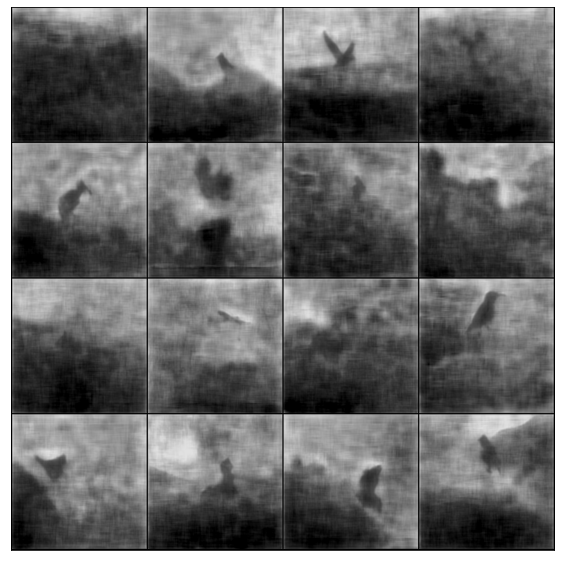

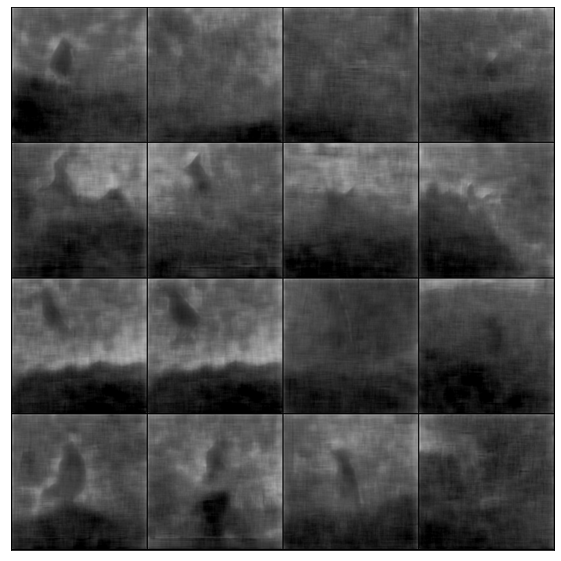

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.5  for epoch:  2
EPOCH: 2


  0%|          | 2/17500 [00:01<4:47:46,  1.01it/s]

Train Epoch: 2 [0/280000 (0%)]	Loss: 0.006894
IOU : 0.6660921781387117


  1%|          | 177/17500 [01:04<1:46:00,  2.72it/s]


KeyboardInterrupt: ignored

In [34]:
from torch.nn import CrossEntropyLoss, BCEWithLogitsLoss, MSELoss, L1Loss, BCELoss, SmoothL1Loss
from src.train.customlossfunction import DiceLoss
# from kornia.losses import SSIM
# loss_fn = SSIM(window_size=3,reduction='sum')
# loss_fn = BCEWithLogitsLoss()
loss_fn = SmoothL1Loss()
# loss_fn = MSELoss()
# loss_fn = DiceLoss()
# loss_fn = BCELoss(reduction='mean')
show_output = False
infer_index = 3
for epoch in range(1, 4):
# for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    
    tr_out = train_model.train_Monocular(cnn_model, device, train_loader, optimizer, epoch, loss_fn, show_output, infer_index)
    ts_out, dice_loss = train_model.test_Monocular(cnn_model, device, test_loader, class_correct, class_total, epoch, lr_data, loss_fn, 
                                        show_output, infer_index)
    
    from src.utils.utils import Utils

    Utils.show(tr_out.detach().cpu(), nrow=4)
    Utils.show(ts_out.detach().cpu(), nrow=4)
    
    scheduler.step(dice_loss)

    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

# train_losses, train_acc = train_model.gettraindata()
# test_losses, test_acc = train_model.gettestdata()
# utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="savedmodels/finalmodelwithdata.pt",
#                       optimizer_state_dict=optimizer.state_dict
#                       , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
#                       test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)

In [0]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="finalmodelwithdata-224k.pt",
                      optimizer_state_dict=optimizer.state_dict
                      , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)